# **Cotents**
**1.Data Preparation**

**2. Model Preparation**

**3. Initial Data Visualization**

**4. Model Training**

**5. Post Data Visualization**

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

##**1. Data Preparation**

###**1.1 Data Loading**

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

###**1.2 Data Selection**

In [4]:
X = iris.data[iris.target!=2][:,:2]
y = iris.target[iris.target!=2]
X.shape, y.shape

((100, 2), (100,))

###**1.3 Data Split**

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

###**1.4 Converting to tensor**

In [6]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float)
X_test_tensor = torch.tensor(X_test, dtype=torch.float)
y_train_tensor = torch.tensor(y_train, dtype=torch.float).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float).unsqueeze(1)
X_train_tensor.shape, y_train_tensor.shape

(torch.Size([80, 2]), torch.Size([80, 1]))

##**2. Model Preparation**

###**2.1 Model Defination**

In [7]:
class LogisticRegresssion(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer = nn.Sequential(
        nn.Linear(in_features=2, out_features=1),
        nn.Sigmoid()
    )

  def forward(self, x):
    return self.layer(x)

###**2.2 Instance of model**

In [8]:
torch.manual_seed(42)
model = LogisticRegresssion()
model.state_dict()

OrderedDict([('layer.0.weight', tensor([[0.5406, 0.5869]])),
             ('layer.0.bias', tensor([-0.1657]))])

##**3. Initial Data Visualizaiton**

###**3.1 Visualizer Function**

In [9]:
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    with torch.no_grad():
        probs = model(grid_tensor).numpy().reshape(xx.shape)

    plt.contourf(xx, yy, probs, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

### **3.2 Plotting the Data**

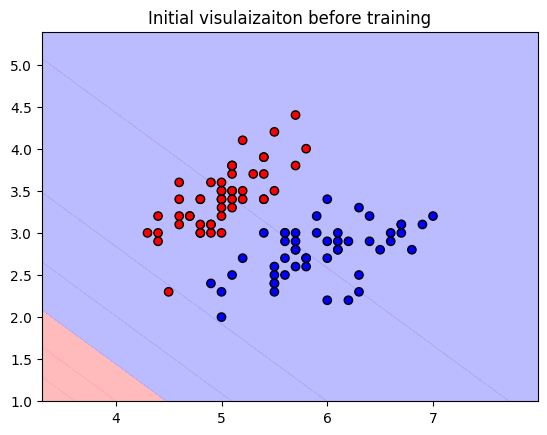

In [10]:
plot_decision_boundary(model, X, y, 'Initial visulaizaiton before training')

##**4. Model Training**

###**4.1 Loss and Optimizer**

In [11]:
loss_fn = nn.BCELoss()

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=0.1)

###**4.2 Training Loop**

In [12]:
def train_loop(model:nn.Module,
               X:torch.tensor,
               y:torch.tensor,
               loss_fn:nn.Module,
               optimizer:torch.optim,
               device:torch.device):

  X = X.to(device)
  y = y.to(device)
  model = model.to(device)

  #1.forward pass
  model.train()
  y_hat = model(X)

  #2.loss calculation
  loss = loss_fn(y_hat,y)

  #3.optimizer zero_grad()
  optimizer.zero_grad()

  #4.loss.backward()
  loss.backward()

  #5.optimizer step
  optimizer.step()

  return loss


### **4.3 Test loop**

In [13]:
def test_loop(model:nn.Module,
               X:torch.tensor,
               y:torch.tensor,
               loss_fn:nn.Module,
               device:torch.device):

  X = X.to(device)
  y = y.to(device)
  model = model.to(device)

  model.eval()
  with torch.inference_mode():
    y_hat = model(X)

  loss = loss_fn(y_hat,y)
  return loss

###**4.4 Acutual Training**

**`Device configuaration`**

In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [15]:
epochs = 10000
epoch_counter = []
train_loss_counter = []
test_loss_counter = []

for epoch in range(epochs):
  epoch_counter.append(epoch)
  train_loss = train_loop(model=model,
                          X=X_train_tensor,
                          y=y_train_tensor,
                          loss_fn=loss_fn,
                          optimizer=optimizer,
                          device=device)
  train_loss_counter.append(train_loss)

  test_loss = test_loop(model=model,
                        X=X_test_tensor,
                        y=y_test_tensor,
                        loss_fn=loss_fn,
                        device=device)
  test_loss_counter.append(test_loss)

  if epoch % 1000 == 0:
    print(f"Epoch:{epoch} | Train_loss: {train_loss} | Test_loss: {test_loss}")


Epoch:0 | Train_loss: 2.1579504013061523 | Test_loss: 2.2415053844451904
Epoch:1000 | Train_loss: 0.051035620272159576 | Test_loss: 0.025614211335778236
Epoch:2000 | Train_loss: 0.02886383607983589 | Test_loss: 0.010417102836072445
Epoch:3000 | Train_loss: 0.017414240166544914 | Test_loss: 0.005773012991994619
Epoch:4000 | Train_loss: 0.011036385782063007 | Test_loss: 0.0035724714398384094
Epoch:5000 | Train_loss: 0.00715277623385191 | Test_loss: 0.0023046189453452826
Epoch:6000 | Train_loss: 0.004650965332984924 | Test_loss: 0.001507746521383524
Epoch:7000 | Train_loss: 0.0030051469802856445 | Test_loss: 0.000980710843577981
Epoch:8000 | Train_loss: 0.0019223548006266356 | Test_loss: 0.0006274703191593289
Epoch:9000 | Train_loss: 0.001216998090967536 | Test_loss: 0.00039373888284899294


In [16]:
model.state_dict()

OrderedDict([('layer.0.weight', tensor([[ 27.4850, -24.0345]])),
             ('layer.0.bias', tensor([-72.2571]))])

###**4.5 Loss Curve**

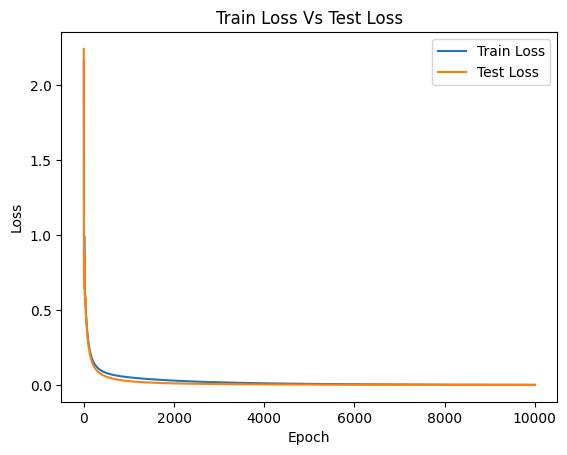

In [17]:
plt.plot(epoch_counter, torch.tensor(train_loss_counter).detach().cpu().numpy(), label="Train Loss")
plt.plot(epoch_counter, torch.tensor(test_loss_counter).detach().cpu().numpy(), label="Test Loss")
plt.title("Train Loss Vs Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

## **5. Post Data Visualization**

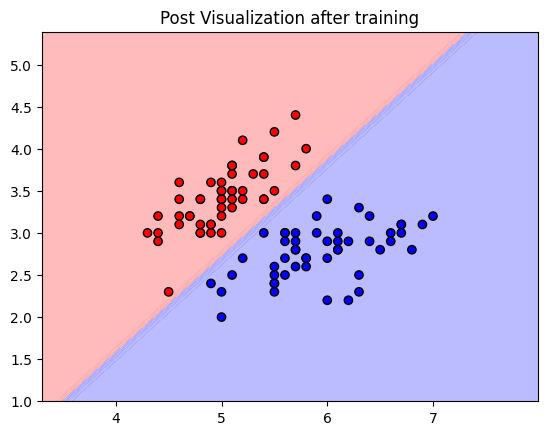

In [18]:
plot_decision_boundary(model.cpu(), X, y, 'Post Visualization after training')